In [ ]:
# Start writing code here...
!pip install --upgrade matplotlib
!pip install geopandas
!pip install Shapely
!pip install plotly

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame 
import plotly.express as px
#from shapely.geometry import Point
from shapely.geometry import Point, LineString, Polygon
accidents = pd.read_csv(r'./accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [ ]:
_deepnote_run_altair(accidents, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"day_of_week","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
filtered = accidents['number_of_casualties'] > 3
complete_major_accidents = accidents[filtered]
complete_nonmajor_accidents= accidents[~filtered]

<AxesSubplot:>

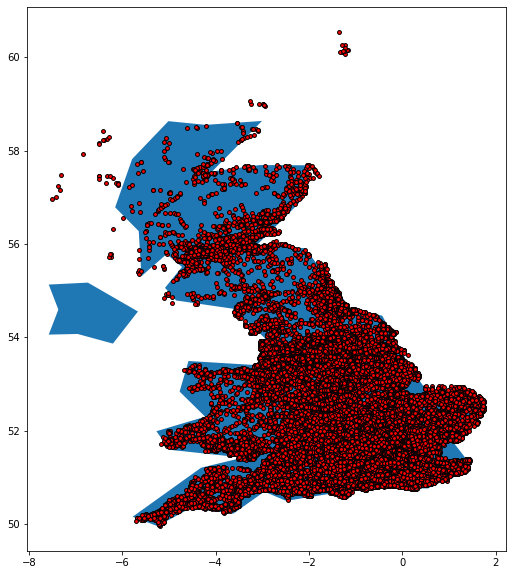

In [ ]:
geometry = [Point(xy) for xy in zip(complete_nonmajor_accidents['longitude'], complete_nonmajor_accidents['latitude'])]
#crs='none'
#geometry = gpd.points_from_xy(complete_nonmajor_accidents.longitude, complete_nonmajor_accidents.latitude)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#geometries = world['geometry'].apply(lambda x: x.wkt).values
#print(geometries)
#print(tuple(geometry))
gdf = GeoDataFrame(complete_nonmajor_accidents,  geometry= geometry, crs =None)
gdf


ax = world[world['name'] == 'United Kingdom'].plot(figsize=(10, 10))
#print(type(ax))
gdf.plot(ax = ax, marker='o', color='red', markersize=15, edgecolor='black')
#gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76e2df7a-4a6e-4112-9680-1feec18bdf23' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>